# PHYS243 Midterm Project
# ChiKit Ho ID# 862191050

In [5]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

Teaching Assistant Evvaluation Data Set

1. Reading the dataset and exporting it into your workflow.

In [6]:
#Import data
url='https://raw.githubusercontent.com/abtinshahidi/Foundation_applied_machine_learning/master/midterm/data_sets/3_TA_evaluation/tae.data'
df=pd.read_csv(url,sep=',',header=None)

In [7]:
#Check dataset
df

,0,1,2,3,4,5
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
...,...,...,...,...,...,...
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1


In [8]:
#Check dimension of the dataset
df.shape

(151, 6)

2. Understanding and explanning the dataset, what are the different attributes of each data point.

A dataframe, df with 151 rows and 6 columns is read, which match with the readme.data as it mentions the number of instances are 151 and number of attributes are 6.

There are 6 attributes in the dataset,

1. If TA is a native English speaker or not (Binary, 1=English Speaker, 2=non English Speaker)
2. Course Instructor (Categorical, 25 Categories)
3. Course (Categorical, 26 Catergories)
4. Summer or Regular Semester (Binary, 1=Summer, 2=Regular)
5. Class Size (numerical)
6. Class attribute (Categorical, 1=Low, 2=Medium, 3=High)

The Output (Labels) is the class attribute (Columne 6) and there are 5 features (Column 1-5). I am going to build a supervised machine learning model. But before building the model, I need to process, cleaning up and understanding the data first.

In [9]:
#Adding column names (features) to df
Columns=['Native','Instructor','Course','Semester','Size','Result']
df.columns=Columns
df

,Native,Instructor,Course,Semester,Size,Result
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
...,...,...,...,...,...,...
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1


In [10]:
#Check is there is a null value
df.isnull().sum()

Native        0
Instructor    0
Course        0
Semester      0
Size          0
Result        0
dtype: int64

There is no null/missing value in the dataset.

Exploring the Data

A. Native English Speaker

In [11]:
#Count the numbers of Native and non-natvie English speaking TA
df.Native.value_counts()

2    122
1     29
Name: Native, dtype: int64

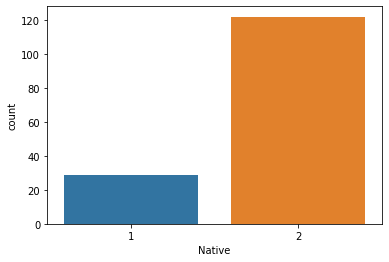

In [12]:
#shown results in bar charts
sns.countplot(x="Native",data=df)

From the above, graph, There are 122 TA who are non-English speakers while there are only 29 TA who are English speakers.

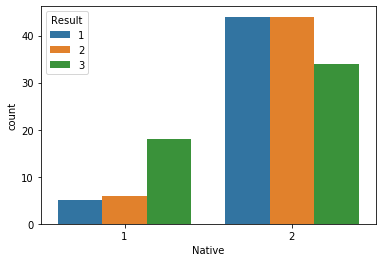

In [13]:
#Bart chart of the Results 
sns.countplot(x="Native",hue="Result",data=df,)

From the graph above, we can notice that there is a higher chance for the English speaking TA to achieve a '3' ('High') while the non-English speaking TA has less chanes to achieve a '3'.

B. Instructor

In [14]:
df.Instructor.value_counts()

23    17
13    14
22    12
7     11
10     8
18     8
6      8
15     8
14     8
9      8
5      6
20     5
8      5
2      4
25     4
16     4
17     4
1      4
11     3
12     2
4      2
3      2
21     2
24     1
19     1
Name: Instructor, dtype: int64

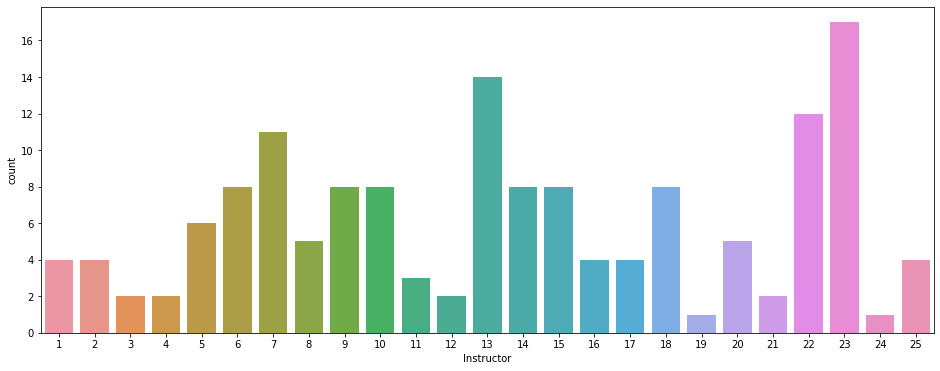

In [15]:
plt.figure(figsize=(16,6))
sns.countplot(x="Instructor",data=df)

The distribution of the instructor is quite even

C. Course

In [16]:
df.Course.value_counts()

3     45
2     16
1     14
15    10
17    10
11     9
7      7
5      5
8      4
9      3
25     3
13     3
16     3
21     3
22     3
18     2
6      2
14     1
12     1
10     1
19     1
20     1
4      1
23     1
24     1
26     1
Name: Course, dtype: int64

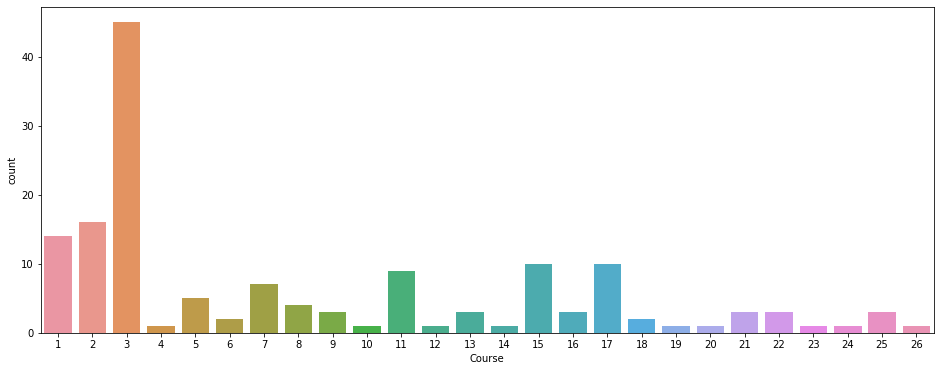

In [17]:
plt.figure(figsize=(16,6))
sns.countplot(x="Course",data=df)

There is a significantly high number of students who enroll course number 3

D. Semester

In [18]:
df.Semester.value_counts()

2    128
1     23
Name: Semester, dtype: int64

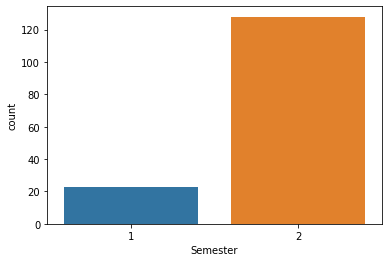

In [19]:
sns.countplot(x="Semester",data=df)

From the graph above, 128 TA evluation is done in the Regular sesmester and ony 23 evluation is done in the Summer Semester

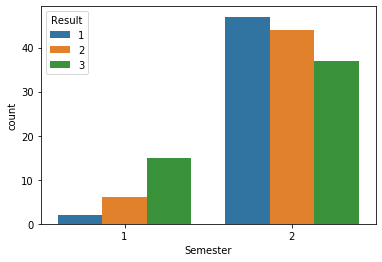

In [20]:
sns.countplot(x="Semester",hue="Result",data=df,)

Students who enroll in summer semester have a higher chance to give a 3 ('High') rating than the regular semester while students in regular semester rate more TA a 1 ('Low').

E. Class Size

In [21]:
df.Size.value_counts()

19    11
20    11
27     7
42     7
10     6
17     6
29     6
31     6
38     6
37     6
24     5
13     4
30     4
21     4
11     4
25     3
39     3
23     3
36     3
22     3
48     3
51     3
12     2
18     2
28     2
33     2
58     2
14     2
9      2
43     2
45     2
46     2
49     2
55     2
15     2
7      1
5      1
66     1
16     1
26     1
32     1
34     1
35     1
44     1
54     1
3      1
Name: Size, dtype: int64

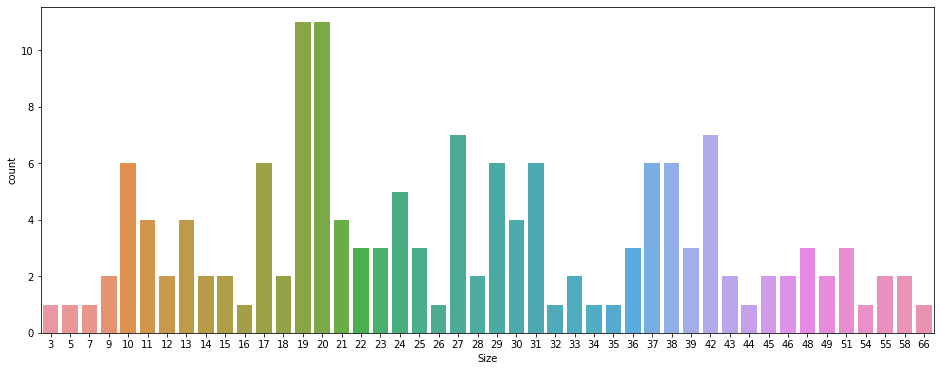

In [22]:
plt.figure(figsize=(16,6))
sns.countplot(x="Size",data=df)

The most common class size are 19-20 students

F. Result

In [23]:
df.Result.value_counts()

3    52
2    50
1    49
Name: Result, dtype: int64

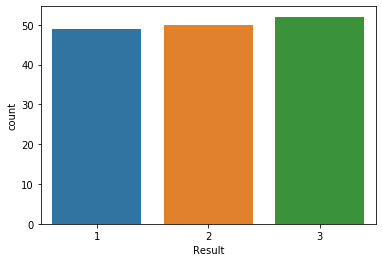

In [24]:
sns.countplot(x="Result",data=df,)

From the graph above, ther result are roughly equal, which match with the readme.data which it stated "The scores were divided into 3 roughly equal-sized categories (1='low',2='medium' and 3='high')

Processing the data

A. Change the data type for ceratin features

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Native      151 non-null    int64
 1   Instructor  151 non-null    int64
 2   Course      151 non-null    int64
 3   Semester    151 non-null    int64
 4   Size        151 non-null    int64
 5   Result      151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


From the above information, there is no null values among the dataset, However, the data types for all data are int64 now, so I need to convert the data types from 'Int64' to 'category' for the following columns,
"Native","Instructor","Course","Semester" and "Result".

In [26]:
#Convert data type
#Convert from int64 to category
df2=df
df2['Instructor']=df2['Instructor'].astype('category')
df2['Course']=df2['Course'].astype('category')
df2['Result']=df2['Result'].astype('category')
df2['Native']=df2['Native'].astype('category')
df2['Semester']=df2['Semester'].astype('category')

In [27]:
df2

,Native,Instructor,Course,Semester,Size,Result
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
...,...,...,...,...,...,...
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Native      151 non-null    category
 1   Instructor  151 non-null    category
 2   Course      151 non-null    category
 3   Semester    151 non-null    category
 4   Size        151 non-null    int64   
 5   Result      151 non-null    category
dtypes: category(5), int64(1)
memory usage: 4.6 KB


Now, the data type of the data set has changed from 5 columns of category and 1 column of int.

Split the Data into training and test set

In [29]:
X=df2.drop(columns=['Result'])
y=df2.Result

In [30]:
# We use the train_test_split function from the sklearn library
# Diving the data set into 70/30 training/testing set
# Random_state is set as 100 beause I don't want the training and testing set are different when running the code each time.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [31]:
#Check the split
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 25 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Native      105 non-null    category
 1   Instructor  105 non-null    category
 2   Course      105 non-null    category
 3   Semester    105 non-null    category
 4   Size        105 non-null    int64   
dtypes: category(4), int64(1)
memory usage: 4.5 KB


In [32]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 128 to 6
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Native      46 non-null     category
 1   Instructor  46 non-null     category
 2   Course      46 non-null     category
 3   Semester    46 non-null     category
 4   Size        46 non-null     int64   
dtypes: category(4), int64(1)
memory usage: 3.4 KB


In [33]:
y_train

25     2
21     2
92     3
9      3
23     2
      ..
87     3
103    2
67     1
24     2
8      3
Name: Result, Length: 105, dtype: category
Categories (3, int64): [1, 2, 3]

In [34]:
y_test.shape

(46,)

In [35]:
#Check the dimension of the X_train, y_train, X_test and y_test
print("Shape of X_Training :",X_train.shape)
print("Shape of y_Training :",y_train.shape)
print("Shape of X_Testing :",X_test.shape)
print("Shape of Y_Testing :",y_test.shape)

Shape of X_Training : (105, 5)
Shape of y_Training : (105,)
Shape of X_Testing : (46, 5)
Shape of Y_Testing : (46,)


Since this dataset is a superverised maching learning with multi-class classification. Decision Tree is the easiest algorithm for the machine learning fiting.

A. Decision Tree

In [36]:
#Building Decision Tree
#We set every parameter as default first
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,recall_score,accuracy_score #classification_report,confusion_matrix,precision_score,
from sklearn import tree

dtc=DecisionTreeClassifier(random_state=100)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

[Text(193.83157894736843, 210.645, 'X[2] <= 6.0\ngini = 0.662\nsamples = 105\nvalue = [29, 39, 37]'),
 Text(99.85263157894738, 197.055, 'X[0] <= 1.5\ngini = 0.634\nsamples = 53\nvalue = [20, 10, 23]'),
 Text(46.98947368421053, 183.465, 'X[4] <= 16.0\ngini = 0.381\nsamples = 17\nvalue = [3, 1, 13]'),
 Text(23.494736842105265, 169.875, 'X[1] <= 17.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1, 0]'),
 Text(11.747368421052633, 156.285, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(35.242105263157896, 156.285, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(70.48421052631579, 169.875, 'X[4] <= 35.5\ngini = 0.133\nsamples = 14\nvalue = [1, 0, 13]'),
 Text(58.736842105263165, 156.285, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 8]'),
 Text(82.23157894736843, 156.285, 'X[4] <= 41.5\ngini = 0.278\nsamples = 6\nvalue = [1, 0, 5]'),
 Text(70.48421052631579, 142.695, 'gini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(93.97894736842106, 142.695, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]'

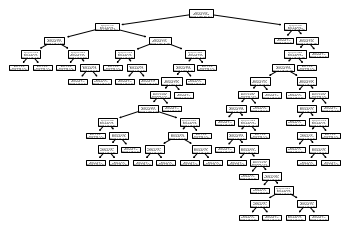

In [37]:
#Plot the tree diagram
tree.plot_tree(dtc)

It seems difficult to read the decisiton tree diagram

Evalutation: 
I am going evalute the model with the F-1 score, recall score and accuracy-socre.
Precision score is the calculation of how accurate the moel is out of those predicted positive. The calculation is as follows,
Precision = True Positive / (True Positive + False Positive)

Recall score calculates how many of the actual positives are captured through the correct label.
Recall score = True Positive / (Ture Positive + False Negative)

F1-score is a function of precision and recall function as it is calcualted as follows,
F1-score = 2 x (Precision * Recall) /( Precision+Recall)

Accuracy score = (True Negative + True Positive) / (True Negative + False Positive + True Positive + False Negative)

In [38]:
# Evaluate the F1 score of the training set
dtc_pred_train=dtc.predict(X_train)
print('F1-score of training set =',f1_score(y_train,dtc_pred_train,average='weighted'))

F1-score of training set = 0.9714285714285714


In [39]:
y_pred=dtc.predict(X_test)

In [40]:
print('F1-Score of the testing set =',f1_score(y_test,y_pred, average='weighted'))

F1-Score of the testing set = 0.662435727653119


In [41]:
print('Recall_score =',recall_score(y_test,y_pred,average='weighted'))

Recall_score = 0.6521739130434783


In [42]:
print("Accuracy_score =:",accuracy_score(y_test, y_pred))

Accuracy_score =: 0.6521739130434783


For the decision truee model, the F1-score of the training set is 0.97, which is a pretty good number. However, the f-1 score, recall score and the accuracy for the testing set is only 0.65. I will try if there is any better fit.

Let's see the importances of each features

In [43]:
features=['Native','Instructor','Course','Semester','Size']


In [44]:
Importance={'features': features,'importance':dtc.feature_importances_}
pd.DataFrame(data=Importance).sort_values(by=['importance'],ascending=False)

,features,importance
4,Size,0.463436
1,Instructor,0.197684
2,Course,0.195499
0,Native,0.073690
3,Semester,0.069691


From the table above, we can see class size and course play the most important parts in the algorithm and their total importance are around 0.66

Now we try to see if we can have a better model by using Random Forest

B. Random Forest

In [45]:
# Builind Random Forest Classifier with default parameter
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [46]:
# Evaluate the F1 score of the training set
rfc_pred_train=rfc.predict(X_train)
print('F1-score of training set =',f1_score(y_train,rfc_pred_train,average='weighted'))

F1-score of training set = 0.9713390619405657


In [47]:
rfc_pred_test=rfc.predict(X_test)

In [48]:
print('F1-Score of the testing set =',f1_score(y_test,rfc_pred_test, average='weighted'))
print('recall_score =',recall_score(y_test,rfc_pred_test,average='weighted'))
print("Accuracy_score =:",accuracy_score(y_test, rfc_pred_test))

F1-Score of the testing set = 0.6556521739130434
recall_score = 0.6521739130434783
Accuracy_score =: 0.6521739130434783


Same as Decision tree, in the random forest model, the F1 score for the training set is 0.97. However, the f1 score, recall score and the accurary score is around 0.65. There is not much difference between using decision tree and random forest, which is a little bit surprised for me.

In [49]:
#Let's see the importance of each features in random forest
Importance2={'features': features,'importance':rfc.feature_importances_}
pd.DataFrame(data=Importance).sort_values(by=['importance'],ascending=False)

,features,importance
4,Size,0.463436
1,Instructor,0.197684
2,Course,0.195499
0,Native,0.073690
3,Semester,0.069691


Conclustion: There is no big difference in importance between Raondom Forest and Dicision Tree

How about if we change the parameter with 'Gini Index' in stead of Entropy?
Gini index has value between [0,0.5] where the interval of Entropy is [0.1]. Entropy is more complex in calculation because it make use of logarithms and consequently. The calculation of the Gini Index will be faster.
In Decision tree, the default criterion is 'Gini Index'

C. Comparsion between 'Gini Index' and Entropy

In [50]:
dtc2=DecisionTreeClassifier(criterion='entropy',random_state=100)
dtc2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [51]:
# Evaluate the F1 score of the training set
dtc2_pred_train=dtc2.predict(X_train)
print('F1-score of training set =',f1_score(y_train,dtc2_pred_train,average='weighted'))

F1-score of training set = 0.9714285714285714


In [52]:
dtc2_pred_test=dtc2.predict(X_test)

In [53]:
print('F1-Score of the testing set =',f1_score(y_test,dtc2_pred_test, average='weighted'))
print('recall_score =',recall_score(y_test,dtc2_pred_test,average='weighted'))
print("Accuracy_score =:",accuracy_score(y_test, dtc2_pred_test))

F1-Score of the testing set = 0.5665424430641821
recall_score = 0.5652173913043478
Accuracy_score =: 0.5652173913043478


In [54]:
Importance={'features': features,'importance':dtc2.feature_importances_}
pd.DataFrame(data=Importance).sort_values(by=['importance'],ascending=False)

,features,importance
4,Size,0.535083
2,Course,0.229944
1,Instructor,0.110294
3,Semester,0.071434
0,Native,0.053245


Conlusion: While using entropy as the criterion, the f1 score for the training set is still 0.97. However, the f1 score, recall score and the accurarcy score drom from 0.65 to 0.56 when compared with the 'Gini Index'. So, entropy is not a good choice, probably, 'entropy' is better fit for the imbalanced datasets.

D. From the importance table above, we can see Native only occupy 0.05 for the importance. 
How about if we drop some non-important features? Will the score improve?

In [55]:
#Drop the Native features in 
X2_train=X_train.drop(columns='Native')
X2_test=X_test.drop(columns='Native')

In [56]:
#Check X2_train
X2_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 25 to 8
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Instructor  105 non-null    category
 1   Course      105 non-null    category
 2   Semester    105 non-null    category
 3   Size        105 non-null    int64   
dtypes: category(3), int64(1)
memory usage: 4.3 KB


In [57]:
#Check X2_test
X2_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 128 to 6
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Instructor  46 non-null     category
 1   Course      46 non-null     category
 2   Semester    46 non-null     category
 3   Size        46 non-null     int64   
dtypes: category(3), int64(1)
memory usage: 3.2 KB


Since Entropy won't give me a better accruracy score, we wil fit the Decison Tree model with "Gini Index"

In [58]:
dtc3=DecisionTreeClassifier(criterion='gini',random_state=100)
dtc3.fit(X2_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [59]:
# Evaluate the F1 score of the training set
dtc3_pred_train=dtc3.predict(X2_train)
print('F1-score of training set =',f1_score(y_train,dtc3_pred_train,average='weighted'))

F1-score of training set = 0.9714285714285714


In [60]:
dtc3_pred_test=dtc3.predict(X2_test)

In [61]:
print('F1-Score of the testing set =',f1_score(y_test,dtc3_pred_test, average='weighted'))
print('recall_score =',recall_score(y_test,dtc3_pred_test,average='weighted'))
print("Accuracy_score =:",accuracy_score(y_test, dtc3_pred_test))

F1-Score of the testing set = 0.591829816086109
recall_score = 0.5869565217391305
Accuracy_score =: 0.5869565217391305


In [62]:
features2=['Instructor','Course','Semester','Size']
Importance={'features': features2,'importance':dtc3.feature_importances_}
pd.DataFrame(data=Importance).sort_values(by=['importance'],ascending=False)

,features,importance
3,Size,0.541966
1,Course,0.221677
0,Instructor,0.182302
2,Semester,0.054055


Conclusion: When we drop the feature of 'Native'. The decision tree model has a f1 score for the training set. However, both the f1 score, recall score and the accuracy score for the testing set are around 0.58, which mean it is performance even poor, which is surprising me again. From the imporance table, the class size and the course occupy around 0.76 of the classification.

Is it because the training set is too small for fitting? I am going to change the split ratio from 70/30 to 80/20

E. Change the Split Ratio from 70/30 to 80/20

In [63]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [64]:
#Check the training and testing set
X3_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 99 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Native      120 non-null    category
 1   Instructor  120 non-null    category
 2   Course      120 non-null    category
 3   Semester    120 non-null    category
 4   Size        120 non-null    int64   
dtypes: category(4), int64(1)
memory usage: 4.8 KB


In [65]:
X3_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 128 to 81
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Native      31 non-null     category
 1   Instructor  31 non-null     category
 2   Course      31 non-null     category
 3   Semester    31 non-null     category
 4   Size        31 non-null     int64   
dtypes: category(4), int64(1)
memory usage: 3.1 KB


In [66]:
#### Check the dimension of the X2_train, y2_train, X2_test and y2_test
print("Shape of X3_Training :",X3_train.shape)
print("Shape of y3_Training :",y3_train.shape)
print("Shape of X3_Testing :",X3_test.shape)
print("Shape of Y3_Testing :",y3_test.shape)

Shape of X3_Training : (120, 5)
Shape of y3_Training : (120,)
Shape of X3_Testing : (31, 5)
Shape of Y3_Testing : (31,)


In [67]:
dtc4=DecisionTreeClassifier(criterion='gini',random_state=100)
dtc4.fit(X3_train,y3_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [68]:
# Evaluate the F1 score of the training set
dtc4_pred_train=dtc4.predict(X3_train)
print('F1-score of training set =',f1_score(y3_train,dtc4_pred_train,average='weighted'))

F1-score of training set = 0.9666666666666667


In [69]:
dtc4_pred_test=dtc4.predict(X3_test)

In [70]:
print('F1-Score of the testing set =',f1_score(y3_test,dtc4_pred_test, average='weighted'))
print('recall_score =',recall_score(y3_test,dtc4_pred_test,average='weighted'))
print("Accuracy_score =:",accuracy_score(y3_test, dtc4_pred_test))

F1-Score of the testing set = 0.7199180747567844
recall_score = 0.7096774193548387
Accuracy_score =: 0.7096774193548387


In [71]:
Importance={'features': features,'importance':dtc4.feature_importances_}
pd.DataFrame(data=Importance).sort_values(by=['importance'],ascending=False)

,features,importance
4,Size,0.407636
1,Instructor,0.246966
2,Course,0.190541
0,Native,0.080087
3,Semester,0.074770


Conclusion: when we change the ratio of the training/testing data, both the f1 score, recall score and accuracy score improve from 0.65 to 0.7.

F. KNN Let's try using the knn alorithm

In [72]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn=KNeighborsClassifier(n_neighbors=11)

#Train the model using the training sets
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [73]:
knn_pred_test=knn.predict(X_test)

In [74]:
print("Accuracy_score =:",accuracy_score(y_test, knn_pred_test))

Accuracy_score =: 0.5


KNN conlusion: The best accurary score is 0.5 when k=11. Still have a poor score when compared with the decition tree model

# Conclusion

1. Decision Tree have the same result compared with Random Forest
2. "Gini Index" have a better fitting result compared with 'Entropy'
3. Dropping some features won't improve the accuracy score in Decision Tree model
4. Change the split from 70/30 to 80/20 can improve the model.
5. KNN model with k=11 best fit the model with the accurary score of 0.5